In [1]:
import pandas as pd
import numpy as np

In [2]:
DB_PATH = "Simulation/FSN_Data_5k.db"

In [3]:
from NetEmbs import *
CONFIG.ROOT_FOLDER = "UvA/Refactoring/"
updateCONFIG_4experiments()

I0803 19:16:52.892944 4711523776 update_config.py:37] Started..


Config file has been updated!
Working directory is  UvA/Refactoring/verMetaDiff_dirCOMBI_walks30_pressure10_/windowSize2/EMB8_batch256_NegSamples512_TFsteps50000_/


## Upload data as Journal Entries

In [4]:
data = upload_data(DB_PATH, limit=3000)
journal_truth = upload_journal_entries(DB_PATH)[["ID", "GroundTruth", "Time"]]

In [5]:
d = data_preprocessing(data)
d.head(2)

,ID,Signature,FA_Name,Credit,Debit,Name,Value,amount,flow
0,7,"([('NoisyLeftFA_kbfq', 0.00041), ('NoisyLeftFA...",FixedAssets,0.000000,1.0,FixedAssets_11,52.184404,52.184404,inflow
1,7,"([('NoisyLeftFA_kbfq', 0.00041), ('NoisyLeftFA...",NoisyLeftFA_kbfq,0.000406,0.0,NoisyLeftFA_kbfq_11,-0.021187,0.021187,outflow


### Construct FSN object

In [6]:
fsn = FSN()
fsn.build(d, left_title="FA_Name")

I0803 19:16:54.446631 4711523776 graph.py:54] FSN constructed!
I0803 19:16:54.447779 4711523776 graph.py:55] Number of Business processes nodes is 523


In [7]:
set_font()
# draw_fsn(fsn, add_node_labels=False)

matplotlib.container.BarContainer

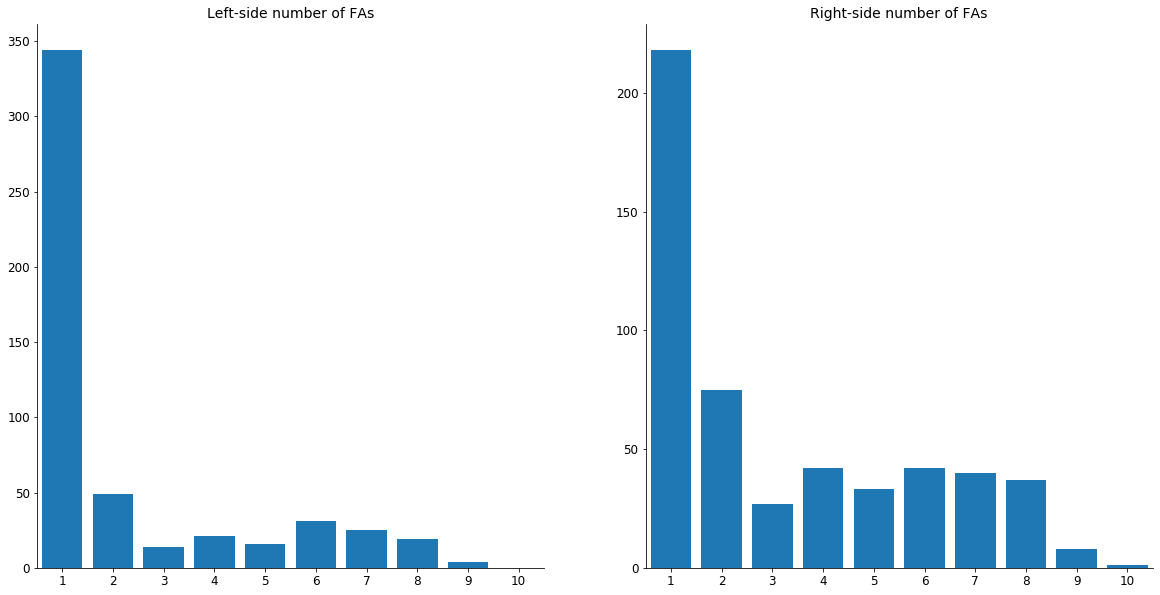

In [8]:
type(draw.financial_accounts_histograms(d))

## Get Embeddings

In [9]:
# 4.  ///////// Getting Skip-Grams \\\\\\\\\\\\
skip_grams, tr = get_SkipGrams(fsn, use_cache=True)
# 5.  ///////// Getting embeddings \\\\\\\\\\\\
embeddings = get_embeddings(skip_grams, tr)

I0803 19:16:56.498157 4711523776 construct_skip_grams.py:82] Loading SkipGrams from cache... wait...
I0803 19:16:56.609951 4711523776 get_embeddings.py:55] Initialising TF model
W0803 19:16:56.610933 4711523776 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:60: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0803 19:16:56.623095 4711523776 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:64: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 19:16:56.625612 4711523776 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:66: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 19:16:56.634537 4711523776 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/g

Current TensorFlow parameters: 
 Embedding size:  8 
 Steps:  50000
 Batch size:  256


W0803 19:16:56.986392 4711523776 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:93: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0803 19:16:56.987818 4711523776 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:94: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0803 19:16:57.047212 4711523776 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:96: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

I0803 19:16:57.049231 4711523776 get_embeddings.py:129] Loading Embeddings from cache... wait...


Loaded Embeddings from cache!


In [10]:
embeddings = embeddings.merge(journal_truth, on="ID")

In [11]:
cl_labs = cl_Agglomerative(embeddings, 11)

I0803 19:16:57.082883 4711523776 agglomerative.py:38] Agglomerative clustering - DONE


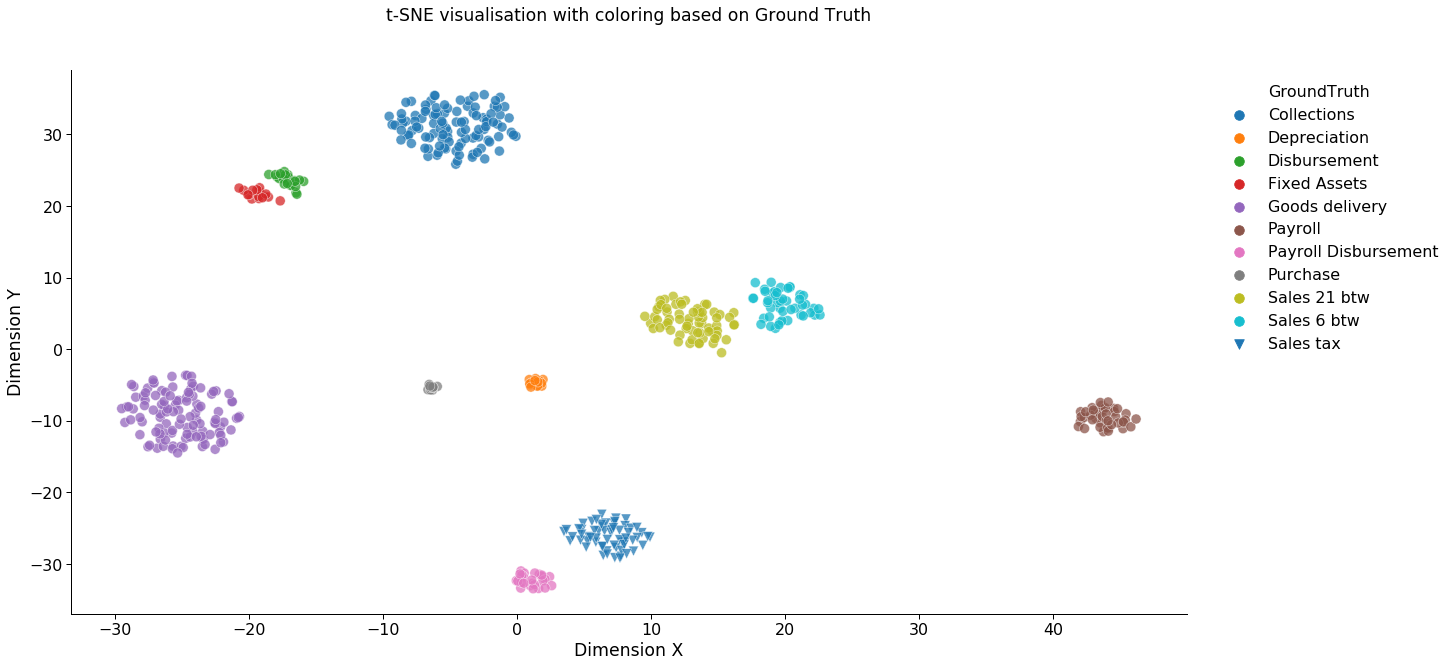

In [12]:
draw.embeddings_2D(cl_labs, legend_title="GroundTruth")

In [ ]:
draw.embeddings_as_heatmap(embeddings)